In [51]:
import pathlib
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline

D_PATH = pathlib.Path(".") / "results/residual"


1000 Index(['Wall time', 'Step', 'Value'], dtype='object')
1000 Index(['Wall time', 'Step', 'Value'], dtype='object')
1000 Index(['Wall time', 'Step', 'Value'], dtype='object')
1000 Index(['Wall time', 'Step', 'Value'], dtype='object')


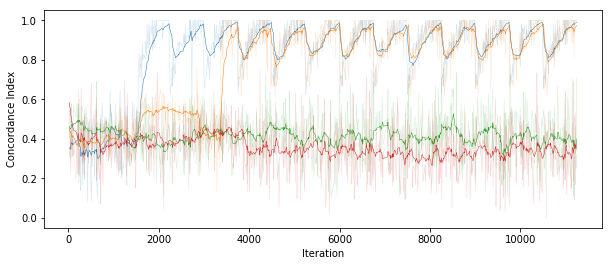

In [75]:
csv_files = D_PATH.glob("run_fold*.csv")

total = pd.DataFrame()
c_re = re.compile('run_fold_(\d).*')
for file in csv_files:
    count = int(c_re.match(file.name).group(1))
    csv_df = pd.read_csv(file)
    print(len(csv_df), csv_df.columns)
    if count == 0:
        total['step'] = csv_df["Step"]
    total[f'ci-{count}'] = csv_df['Value']

# print(total)

smooth_weight = .9
for i in range(4):
    p = plt.plot(total['step'], total[f'ci-{i}'], linewidth=.5, alpha=.2)
    
    smoothed = []
    last = total[f'ci-{i}'].values[0]
    for point in total[f'ci-{i}'].values:
        smoothed_val = last*smooth_weight + (1 - smooth_weight)*point
        smoothed.append(smoothed_val)
        last = smoothed_val
        
    plt.plot(total['step'], smoothed, color=p[0].get_color(), linewidth=.5)

plt.xlabel("Iteration")
plt.ylabel("Concordance Index")

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(10, 4)
# ax.set_aspect(4000)

plt.savefig("outputs/residual_train.png", dpi=500)
plt.show()